# Lesson 1.07 Principles of Data Visualisation

In this guided practice lab you will use Pandas, Matplotlib, and Seaborn to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and how to manipulate the style of your plots with Matplotlib.

### Introduction

In this lab, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

Toward the end of the lab, we will show some motivational plots using Seaborn, a popular statistics plotting library, as well as go more in-depth about how Matplotlib works.

### Pandas Plotting Documentation

[Link to Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For the full list of available styles check out matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
# Read more on matplotlib’s fivethirtyeight style at this link - https://www.dataquest.io/blog/making-538-plots/
plt.style.use('fivethirtyeight')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Create fake data for examples

In [2]:
# create a random data frame of 10 rows and 4 columns
df = pd.DataFrame(np.random.rand(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [3]:
# display the newly created data frame
df

,col1,col2,col3,col4
a,0.616139,0.097196,0.231299,0.139134
b,0.439819,0.294428,0.836586,0.284273
c,0.737469,0.623209,0.385746,0.785106
d,0.904582,0.887109,0.634393,0.641930
e,0.343938,0.890792,0.838789,0.531848
f,0.670764,0.713088,0.280849,0.464701
g,0.110460,0.576447,0.311996,0.913308
h,0.350969,0.261880,0.328632,0.468986
i,0.166833,0.881876,0.815393,0.906233
j,0.306454,0.402855,0.372328,0.104940


<AxesSubplot:>

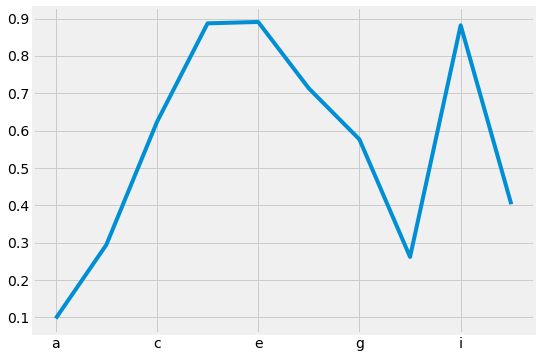

In [4]:
# generate a plot of the col2 column from the random dataframe created above
# Make plots of DataFrame col using matplotlib / pylab
# More info at https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html
df['col2'].plot()

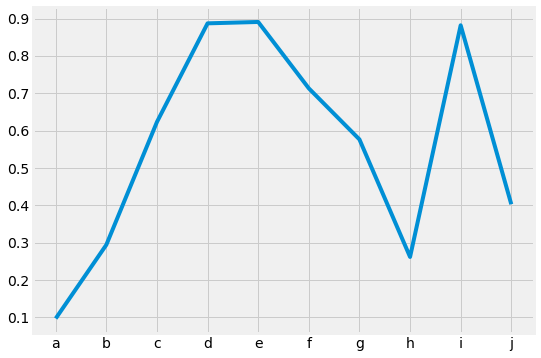

In [5]:
# another way to generate a plot of the col2 column from the random dataframe created above
# Make plots of DataFrame col using matplotlib
# More info at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(df['col2'])

### Choosing the right type of visualization

The choice of visualization should depend what you are trying to show. Here is a helpful flowchart that you can use to determine the best type of visualizations.

![Chart Suggestions](../assets/images/chart_suggestions.png)

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---

- **Objective:** **Use** Pandas methods for plotting.
- **Objective:** **Create** line plots, bar plots, histograms, and box plots.

### Line Plot With a `DataFrame`

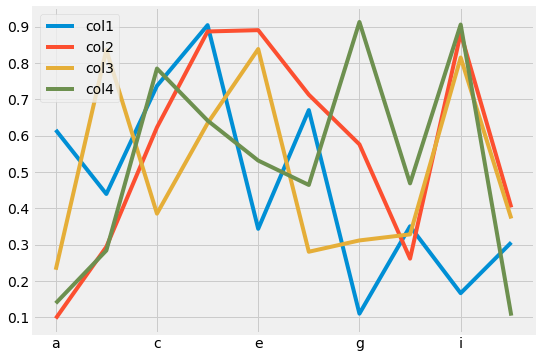

In [6]:
# default df plot
df.plot();

### How to change the size of a plot

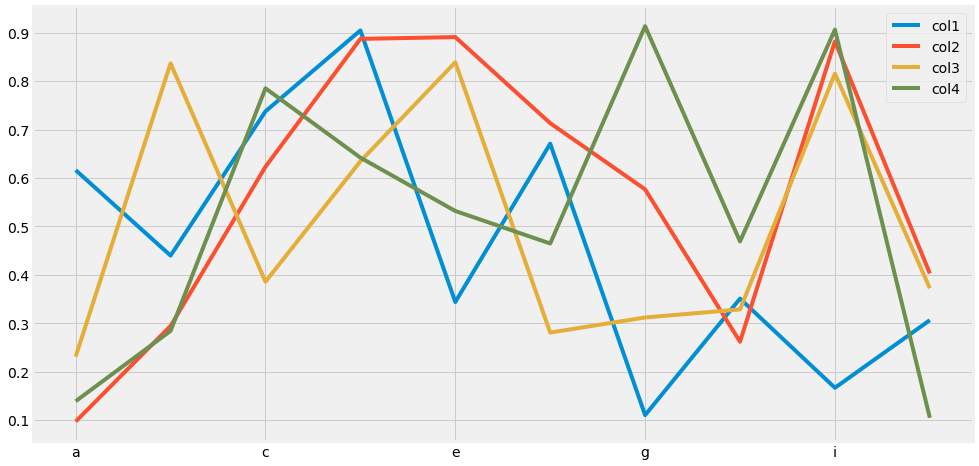

In [7]:
# Technically the figsize is 15 "inches" (width) by 8 "inches" (height)
# The figure is specified in inches for printing
# To set a dpi (dots/pixels per inch), check out tutorialspoint.com/how-to-change-the-dpi-of-a-pandas-dataframe-plot-in-matplotlib
df.plot(figsize=(15,8)); # width, height

### How to change the colour of a plot

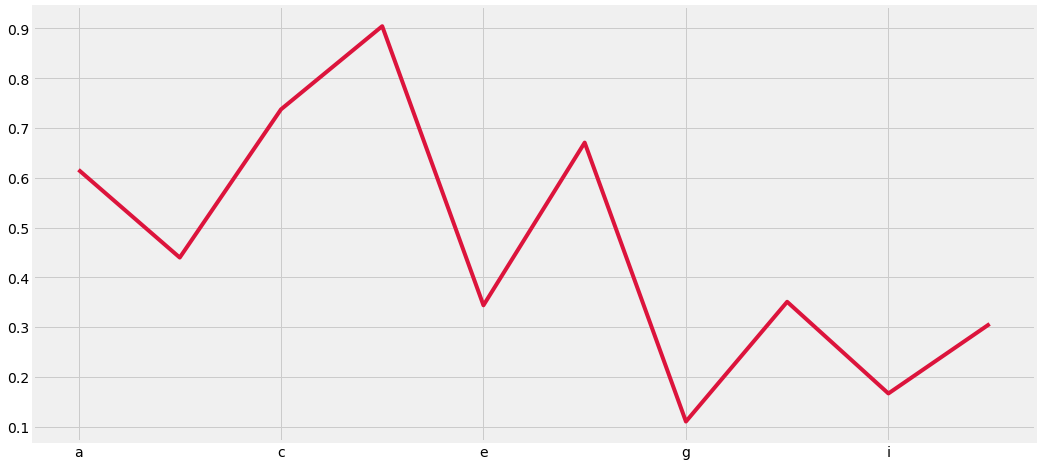

In [8]:
# Full list of colours can be found at https://matplotlib.org/stable/gallery/color/named_colors.html
df['col1'].plot(figsize=(16,8), color='crimson');

### How to change the style of individual lines

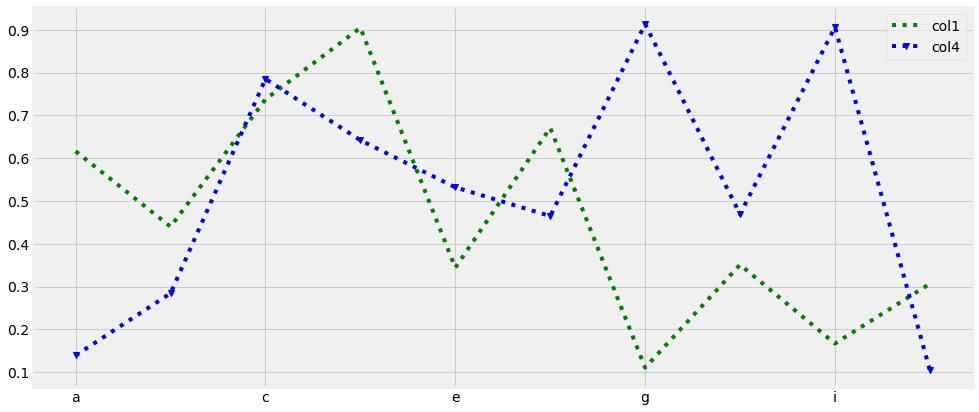

In [9]:
# 'g:' refers to green (g) dotted line (:)
# 'b:v' refers to blue (b) dotted line (:) with triangle_down (v)

style_dict = {'col1': 'g:', 'col4': ':vb'}
df[['col1', 'col4']].plot(figsize=(15,7), 
                          style=style_dict);

### Load in data sets for visualization examples.

The Boston data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [10]:
# Read in the Boston housing data.
housing_csv = '../datasets/boston_housing_data.csv'
housing = pd.read_csv(housing_csv)



# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
# set the location of the data file
url = '../datasets/drinks.csv'

# header = 0 means to not use the column headers in the data file
# names = drink_cols means to set the drink_cols list as the columns headers 
# na_filter = false means that we already know our data has no NAs and the file is very large, so we skip the na_filter check by setting it to false
# more info at na_filter can be found at https://michaeljsanders.com/2017/04/10/pandas-csv-nafilter.html
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)



# Read in the ufo data.
ufo = pd.read_csv('../datasets/ufo.csv')

# convert the time column to a Python datetime datatype
ufo['Time'] = pd.to_datetime(ufo.Time)

# create a new Year column in df and store in it all values of time column in Year only format
ufo['Year'] = ufo.Time.dt.year

In [11]:
# Count the number of ufo reports each year (and sort by year).

#ufo_data = ufo.groupby('Year').count().sort_values('Year')[['City']].sort_index()
ufo_data = ufo['Year'].value_counts().sort_index()
ufo_data.head()

1930    2
1931    2
1933    1
1934    1
1935    1
Name: Year, dtype: int64

<AxesSubplot:>

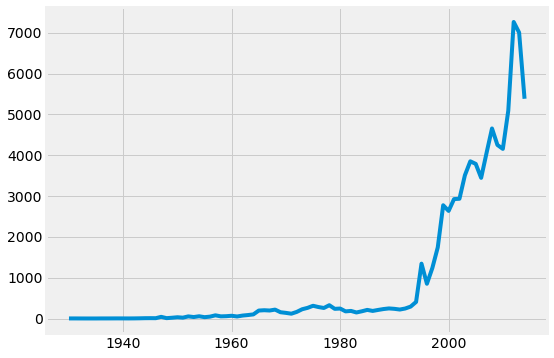

In [12]:
# Compare with line plot -- UFO sightings by year. (Ordering by year makes sense.)
# listed below is the short form of this code --> ufo_data['Year'].value_counts().sort_index().plot()
ufo_data.plot()

<AxesSubplot:xlabel='continent'>

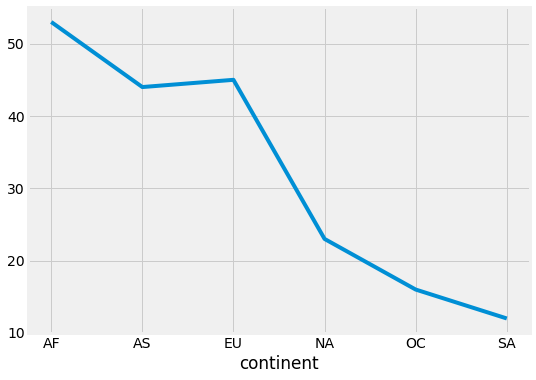

In [13]:
# COMMON MISTAKE: Don't use a line plot when the x-axis cannot be ordered logically

# For example, ordering by continent below shows a trend where no exists ... 
#    it would be just as valid to plot the continents in any order.
# So, a line plot is the wrong type of plot for this data.
# Always think about what you're plotting and if it makes sense.


drinks.groupby('continent').count()['country'].plot(kind='line')
#drinks.groupby('continent').count()['country'].plot(kind='bar')


**Important:** A line plot is the wrong type of plot for this data. Any set of countries can be rearranged misleadingly to illustrate a negative trend, as we did here. Due to this, it would be more appropriate to represent this data using a bar plot, which does not imply a trend based on order.

<AxesSubplot:ylabel='continent'>

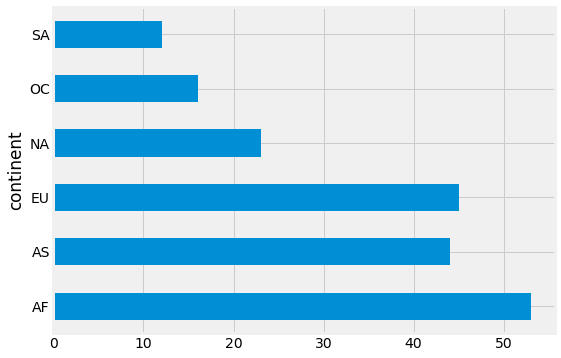

In [14]:
# Plot the same data as a (horizontal) bar plot -- a much better choice!
# More info on the possible values for 'kind' can be found at pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
drinks.groupby('continent').count()['country'].plot(kind='barh')

Create a line plot of `ZN` and `INDUS` in the housing data. 

- For `ZN`, use a solid green line. For `INDUS`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html). (Hint: see [additional topics](#additional-topics))

In [15]:
housing.columns
# notice the extra spaces in some of the column names like ZN for example

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
# cleaning them up by using strip() to remove extra spaces
housing.columns = [col.strip() for col in housing.columns]
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

<AxesSubplot:>

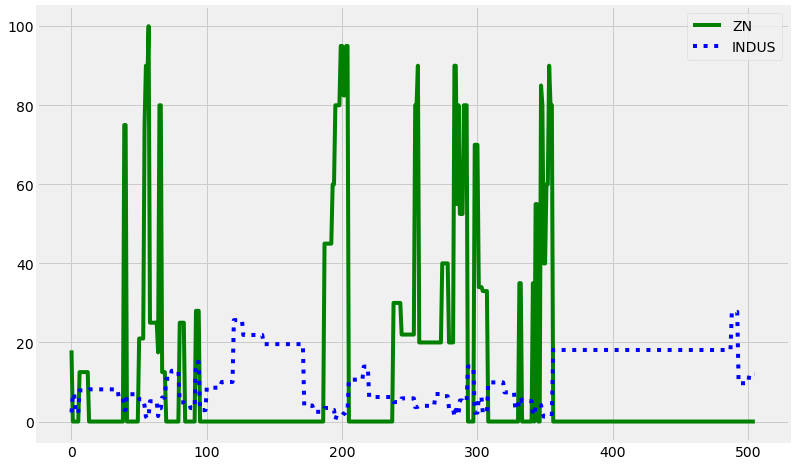

In [17]:
# pick one or the other of the below styling options...
# plt.style.use('seaborn-pastel') #  either a global style 
housing_style = {'ZN': 'g', 'INDUS': 'b:'} # or your own specifications

# plot 2 trendlines for ZN and INDUS respectively
housing[['ZN', 'INDUS']].plot(figsize=(12,8),
                              style=housing_style)

Text(0, 0.5, 'Y Label')

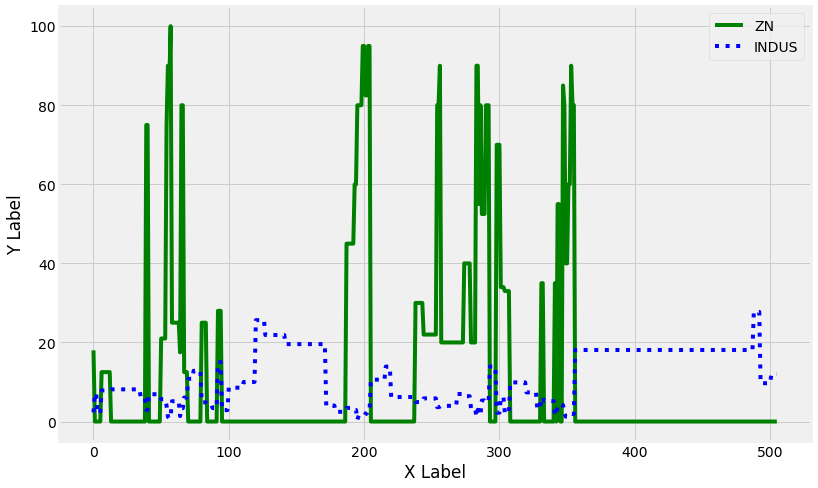

In [18]:
# plot 2 trendlines for ZN and INDUS respectively
ax = housing[['ZN', 'INDUS']].plot(figsize=(12,8),
                              style=housing_style)
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

In [19]:
# print first five rows of drinks data frame
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [20]:
# group drinks df by continent column display the number of occurences of each continent
drinks.groupby('continent').count()['country']

continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: country, dtype: int64

In [21]:
# another method to do the above
# display the number of occurences of each continent within the drink df
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [22]:
# Count the number of countries in each continent.
# drinks.continent.value_counts()

pd.pivot_table(drinks, 
               values=['country'],
               index=['continent'], 
               aggfunc='count')

,country
continent,
AF,53
AS,44
EU,45
NA,23
OC,16
SA,12


<AxesSubplot:>

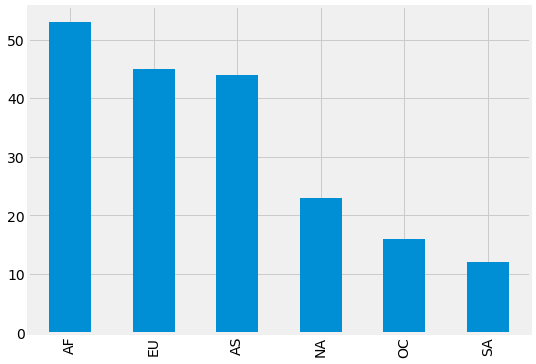

In [23]:
# Compare with bar plot.
drinks.continent.value_counts().plot(kind='bar')

In [24]:
# Calculate the mean alcohol amounts for each continent.
drinks_data = drinks.groupby('continent').mean()
print(drinks_data)
# and then calculate the sum total
drinks_data['total'] = drinks_data[drinks_data.columns].sum(axis=1)

# if you wanted to sum just beer/spirit/wine
# [col for col in drinks_data.columns if col != 'liters']

drinks_data

                 beer      spirit        wine    liters
continent                                              
AF          61.471698   16.339623   16.264151  3.007547
AS          37.045455   60.840909    9.068182  2.170455
EU         193.777778  132.555556  142.222222  8.617778
NA         145.434783  165.739130   24.521739  5.995652
OC          89.687500   58.437500   35.625000  3.381250
SA         175.083333  114.750000   62.416667  6.308333


,beer,spirit,wine,liters,total
continent,,,,,
AF,61.471698,16.339623,16.264151,3.007547,97.083019
AS,37.045455,60.840909,9.068182,2.170455,109.125000
EU,193.777778,132.555556,142.222222,8.617778,477.173333
NA,145.434783,165.739130,24.521739,5.995652,341.691304
OC,89.687500,58.437500,35.625000,3.381250,187.131250
SA,175.083333,114.750000,62.416667,6.308333,358.558333


<AxesSubplot:xlabel='continent'>

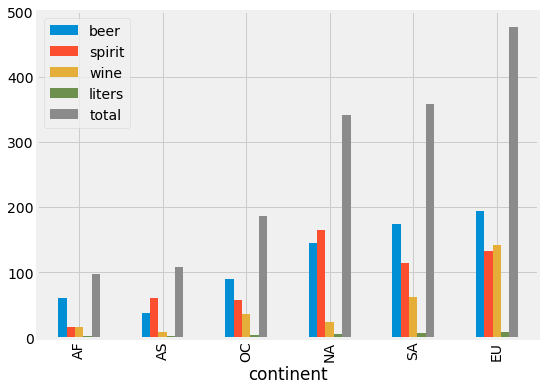

In [25]:
# Read more on sort_values at pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
# Read more on plot options at pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
drinks_data.sort_values('total').plot(kind='bar')

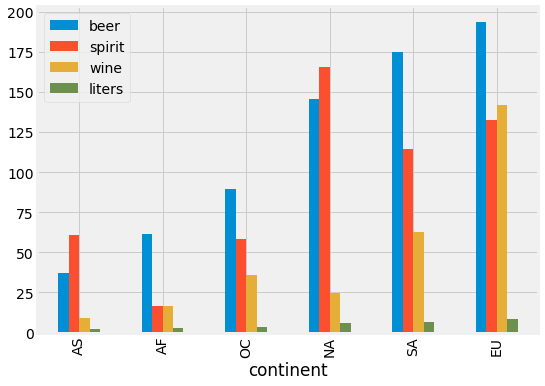

In [26]:
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().sort_values('beer').plot(kind='bar');

In [27]:
# drop liters column 
# read more on drop method at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html 
drinks.drop(['liters'], axis = 1, inplace=True)

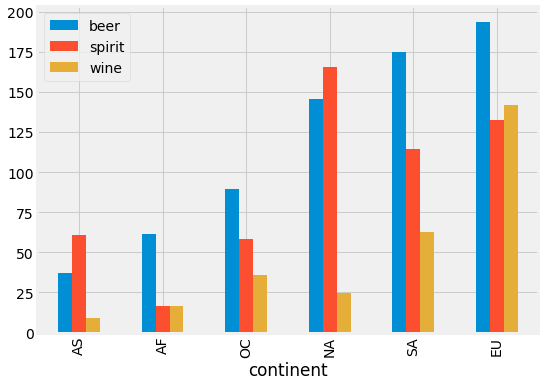

In [28]:
# group the data in drinks df by the continent column and derive their associated means
# plot the mean values for each continent sorted in ascending order of the beer value
drinks.groupby('continent').mean().sort_values('beer').plot(kind='bar');

### Using a `DataFrame` and Matplotlib commands, we can get fancy.

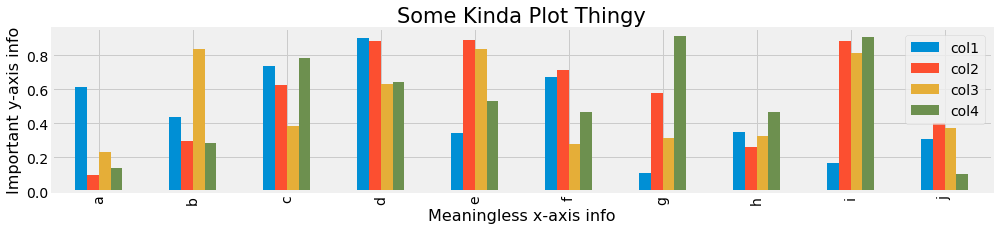

In [29]:
ax = df.plot(kind='bar', figsize=(15,3));

# Set the title.
# More info at https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html
ax.set_title('Some Kinda Plot Thingy', fontsize=21);

# Move the legend to loc=1 which is the upper right end of the chart
# More info at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(loc=1);

# y-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16);

# x-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16);

Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

Text(0.5, 0, 'Meaningless x-axis info')

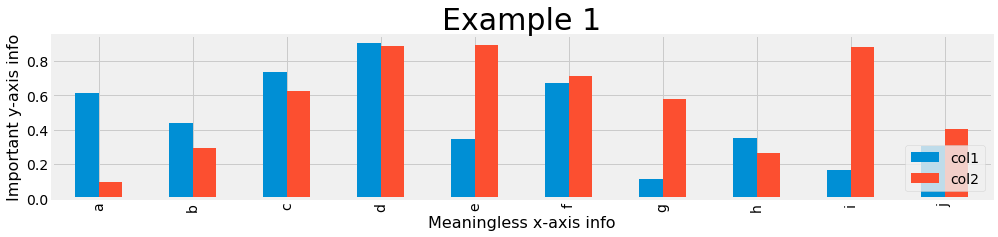

In [30]:
ax = df[['col1','col2']].plot(kind='bar', figsize=(15,3));
# Set the title.
ax.set_title('Example 1', fontsize=30);
# Move the legend to loc=4 which is the lower right end of the chart
# More info at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(loc=4);
# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16);
# y-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16)

- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

Text(0.5, 0, 'Meaningless x-axis info')

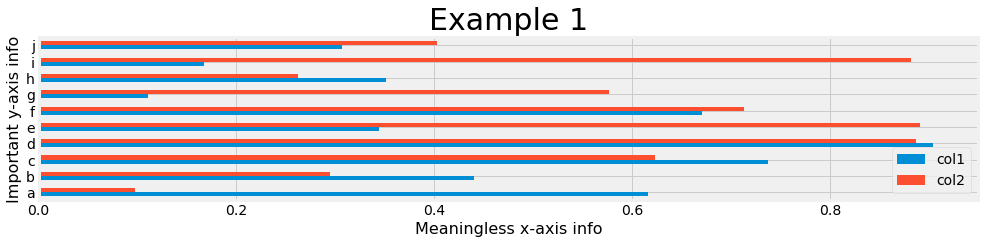

In [31]:
ax = df[['col1','col2']].plot(kind='barh', figsize=(15,3));
# Set the title.
ax.set_title('Example 1', fontsize=30, y=1.01);
# Move the legend to loc=4 which is the lower right end of the chart
# More info at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(loc=4);
# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16);
# y-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16)

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


In [32]:
# Sort the beer column by descending order
drinks.sort_values('beer',ascending=False)

,country,beer,spirit,wine,continent
117,Namibia,376,3,1,AF
45,Czech Republic,361,170,134,EU
62,Gabon,347,98,59,AF
65,Germany,346,117,175,EU
98,Lithuania,343,244,56,EU
...,...,...,...,...,...
107,Mauritania,0,0,0,AF
158,Somalia,0,0,0,AF
111,Monaco,0,0,0,EU
128,Pakistan,0,0,0,AS


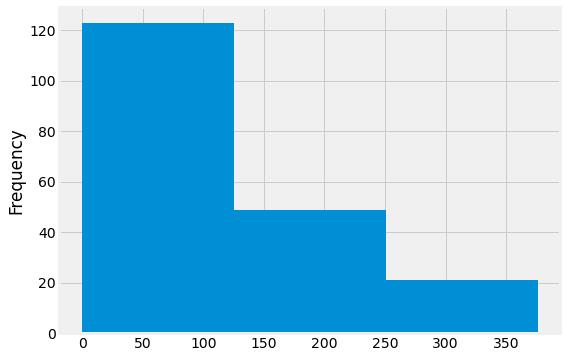

In [33]:
# Compare the above with histogram by split data into three groups i.e. bins=3.
# Resultant histogram can be use to visualise how many of the points are in the groups 1-125, 125-250, and 250-376
drinks.beer.plot(kind='hist', bins=3);

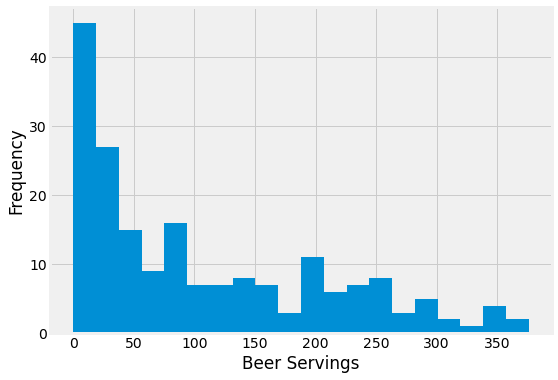

In [34]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.
drinks.beer.plot(kind='hist', bins=20);
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');

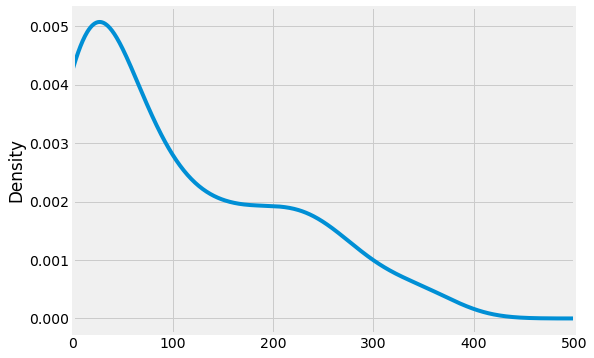

In [35]:
# Compare with density plot (smooth version of a histogram)
# xlim refers to the range of the plot's X-axis
drinks.beer.plot(kind='density', xlim=(0, 500));

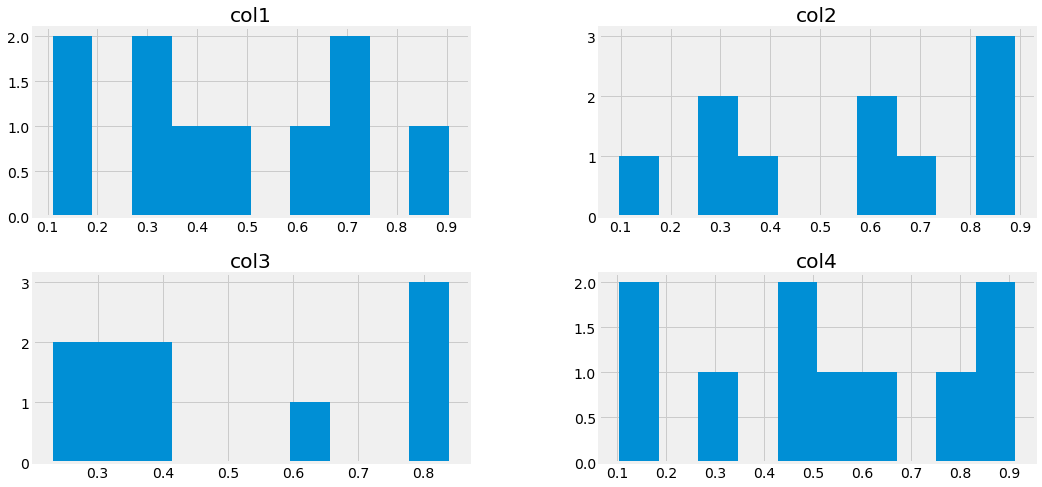

In [36]:
# Making histograms of DataFrames — histogram of random data
# Plots histograms for every column in the data frame
df.hist(figsize=(16,8));

### Single Histogram

In [37]:
# Draw 5000 samples from a standard Normal distribution (mean=0, stdev=1)
# More info at https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html
norm = np.random.standard_normal(5000)

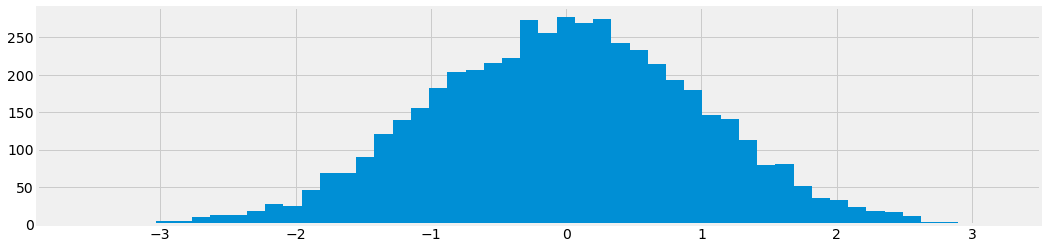

In [38]:
# Plot an histogram of the norm array with 50 bins
pd.Series(norm).hist(figsize=(16,4), bins=50);

### Another bins example: Sometimes the binning makes the data look different or misleading.

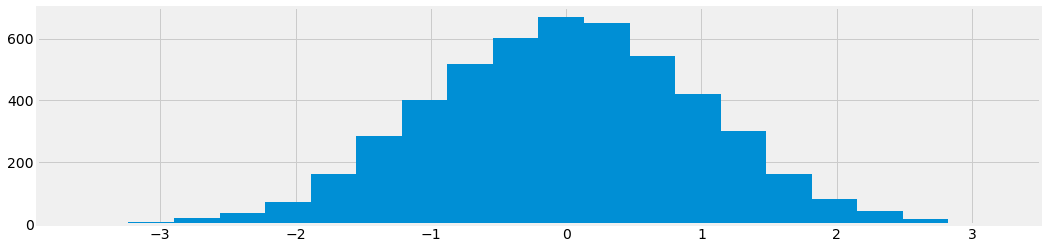

In [39]:
# Plot an histogram of the norm array with 20 bins
# this chart shows a smoother representation of the data with somewhat shorter tails than the previous chart
pd.Series(norm).hist(figsize=(16,4), bins=20);

### Create a histogram with pandas for using `MEDV` in the housing data.
- Set the bins to 20.

In [40]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

<AxesSubplot:>

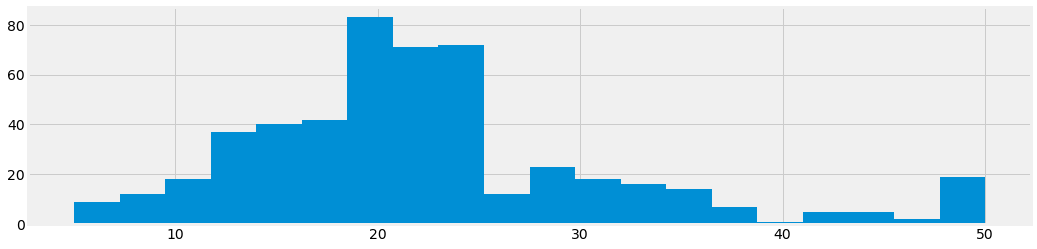

In [41]:
# Plot an histogram of the MEDV column in housing df with 20 bins
housing['MEDV'].hist(figsize=(16,4), bins=20)

<a id="grouped-histograms"></a>
### Grouped histograms: Show one histogram for each group.

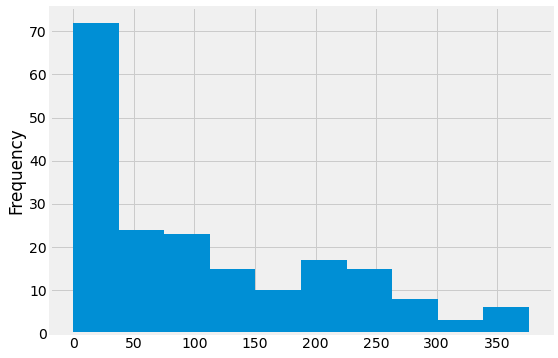

In [42]:
# Visualise overall histogram of beer servings
drinks.beer.plot(kind='hist');

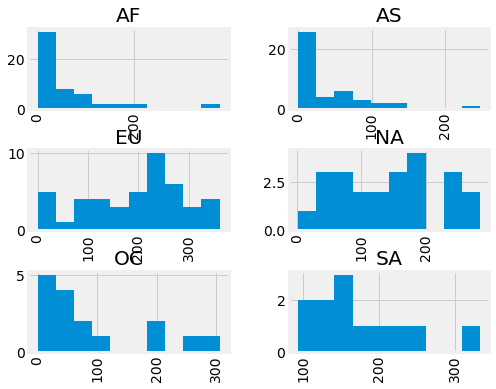

In [43]:
# Histogram of beer servings grouped by continent 
# Graphs might be misleading since they have different scales / axes
drinks.hist(column='beer', by='continent');

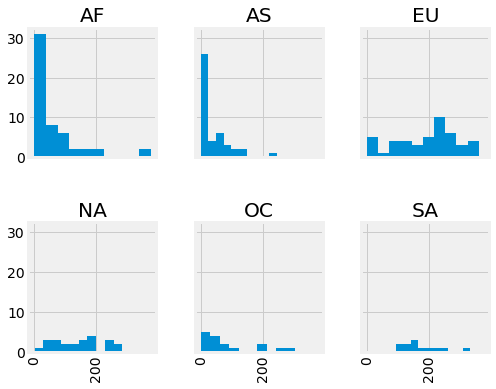

In [44]:
# To avoid being misled by the above charts, we can set the axes to be the same across the plots 
# This is done by setting the sharex and sharey to be True to ensure the plots share the same x- and y-axes.
drinks.hist(column='beer', by='continent', sharex=True, sharey=True, layout=(2, 3));

<a id="box-plots"></a>
## Box Plots: Show quartiles (and outliers) for one or more numerical variables
---

We can use boxplots to quickly summarize distributions.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

### Let's see how box plots are generated so we can best interpret them.

In [45]:
# Sort the spirit column.
drinks.spirit.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

In [46]:
# Show "five-number summary" for spirit.
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

'\nBoxplot returns a dictionary mapping each component of the boxplot to a list of the matplotlib.lines.Line2D instances created. \n\nThat dictionary has the following keys (assuming vertical boxplots):\n    boxes: the main body of the boxplot showing the quartiles.\n    medians: horizontal lines at the median of each box.\n    whiskers: the vertical lines extending to the most extreme, non-outlier data points.\n'

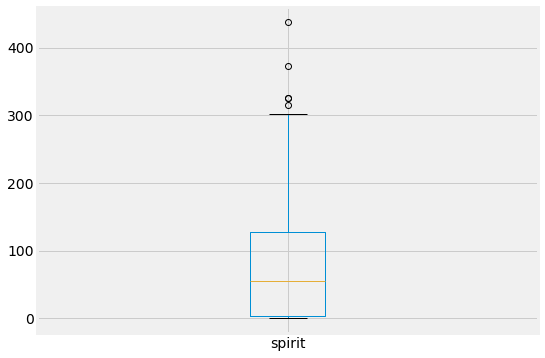

In [47]:
# compare above table with box plot below
drinks.spirit.plot(kind='box');

'''
Boxplot returns a dictionary mapping each component of the boxplot to a list of the matplotlib.lines.Line2D instances created. 

That dictionary has the following keys (assuming vertical boxplots):
    boxes: the main body of the boxplot showing the quartiles.
    medians: horizontal lines at the median of each box.
    whiskers: the vertical lines extending to the most extreme, non-outlier data points.
'''

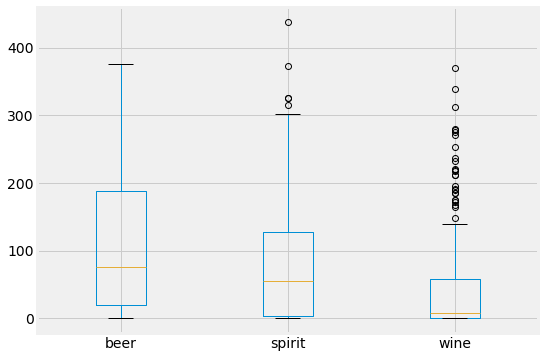

In [48]:
# Create box plots for multiple variables from the drinks data frame.
drinks.plot(kind='box');

### How to use a box plot to preview the distributions in the housing data

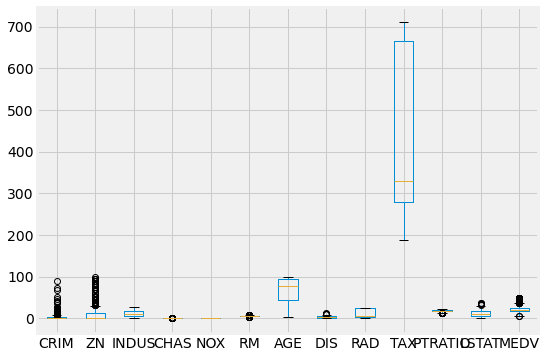

In [49]:
housing.boxplot();

<a id="grouped-box-plots"></a>
### Grouped box plots: Show one box plot for each group.

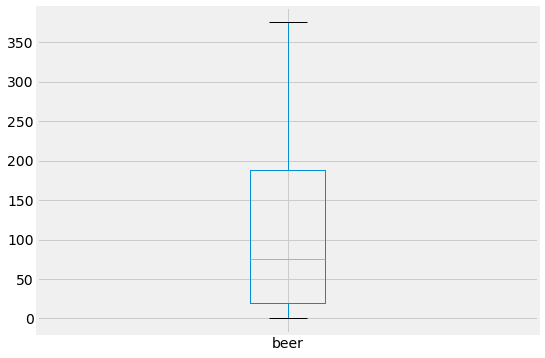

In [50]:
# Recap on creating a basic box plot of a specific column i.e. overall beer servings
drinks.beer.plot(kind='box');

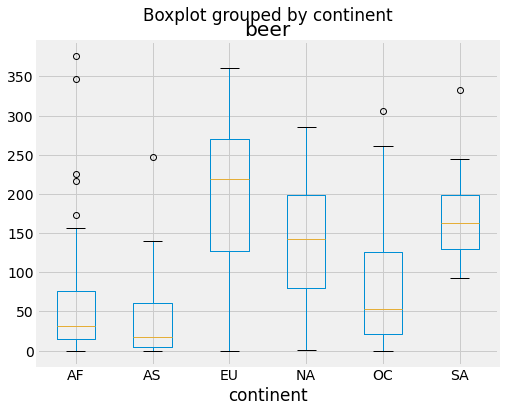

In [51]:
# Box plot of beer servings column grouped by continent
drinks.boxplot(column='beer', by='continent');

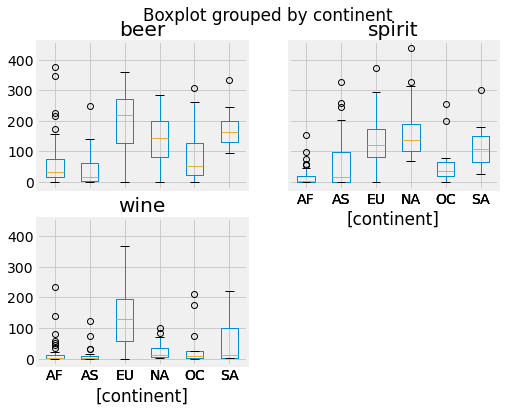

In [52]:
# Box plot of all numeric columns grouped by continent
# Each box plot visualises the continent breakdown for one of the df's numeric column (beer, spirit and wine)
drinks.boxplot(by='continent');

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


In [53]:
# Select the beer and wine columns and sort by beer.
drinks[['beer', 'wine']].sort_values('beer').values

array([[  0,   0],
       [  0,  74],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  1,   7],
       [  1,   1],
       [  1,   4],
       [  1,   1],
       [  2,   0],
       [  3,   1],
       [  5,   0],
       [  5,   0],
       [  5,  16],
       [  5,   1],
       [  5,   0],
       [  6,   1],
       [  6,   0],
       [  6,   1],
       [  6,   9],
       [  8,   0],
       [  8,   1],
       [  8,   1],
       [  9,   2],
       [  9,   0],
       [  9,   7],
       [  9,   0],
       [ 12,  10],
       [ 13,   0],
       [ 15,   3],
       [ 15,   1],
       [ 16,   5],
       [ 16,   0],
       [ 17,   1],
       [ 18,   0],
       [ 19,  32],
       [ 19,   2],
       [ 20,   0],
       [ 20,  31],
       [ 21,  11],
       [ 21,  11],
       [ 21,   5],
       [ 21,

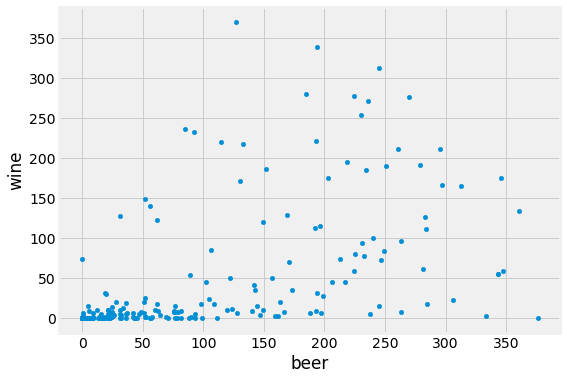

In [54]:
# Compare with scatter plot.
drinks.plot(kind='scatter', x='beer', y='wine');

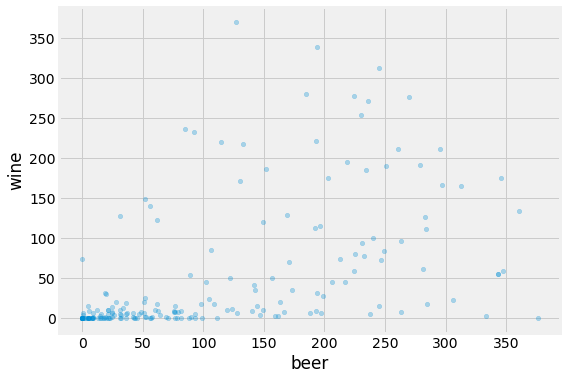

In [55]:
# Adding transparency i.e. alpha is great for plotting several graphs on top of each other, or for illustrating density!)
# We will look at overlapping charts in later lessons
# In the interim, if you are keen to learn more, check out https://stackoverflow.com/questions/24078774/overlay-two-ggplot2-stat-density2d-plots-with-alpha-channels
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3);

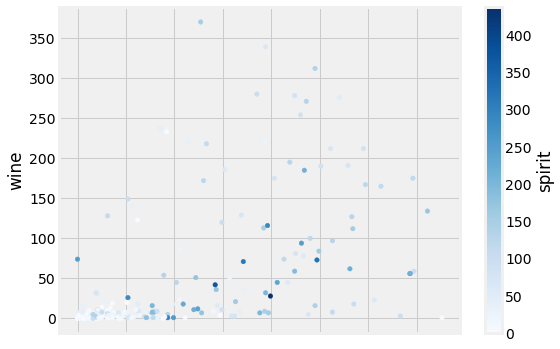

In [56]:
# Set the 'c' parameter to the specific column to use to set the color intensity
# In this instance, vary point color by spirit servings
# More info on c and colormap params at:
    # https://stackoverflow.com/questions/52108558/how-does-parameters-c-and-cmap-behave-in-a-matplotlib-scatter-plot
    # https://matplotlib.org/stable/tutorials/colors/colormaps.html

drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues');

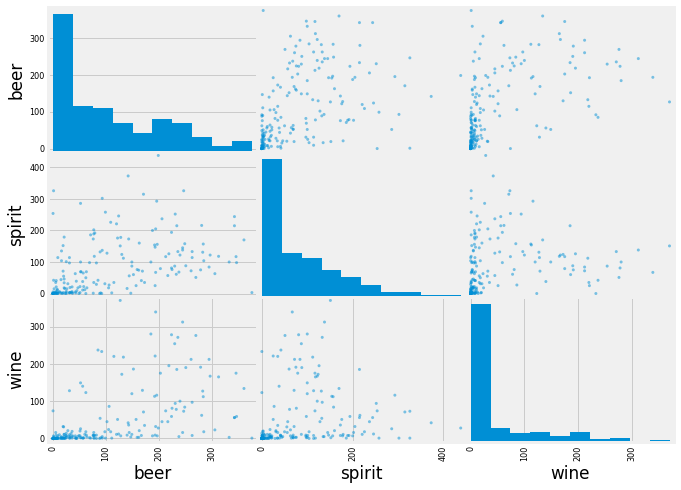

In [57]:
# Scatter matrix of three numerical columns
# A histogram gets created when the x and y axes are the same column
# More info at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8));

### Plotting `DataFrames`

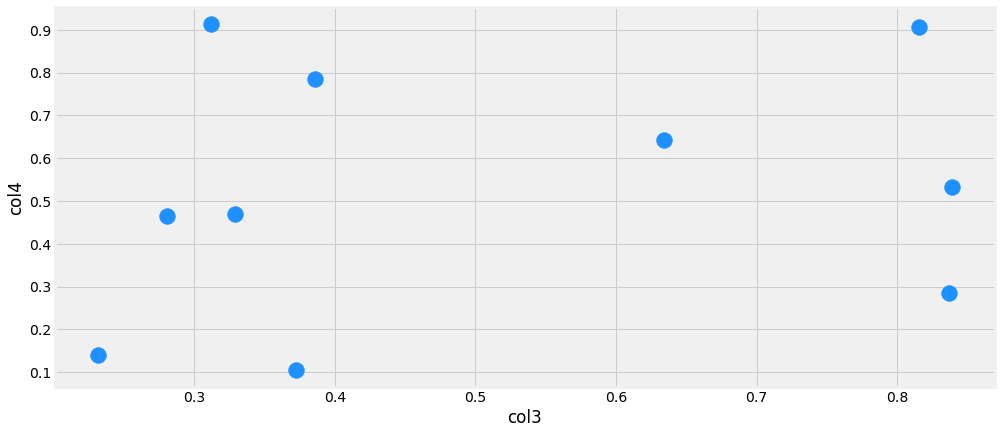

In [58]:
# More info at https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-scatter
# s refers to the marker size
df.plot(x='col3', y='col4', kind='scatter', color='dodgerblue',
        figsize=(15,7), s=250);

### How to view the association between the variables `ZN` and `INDUS` using a scatter plot

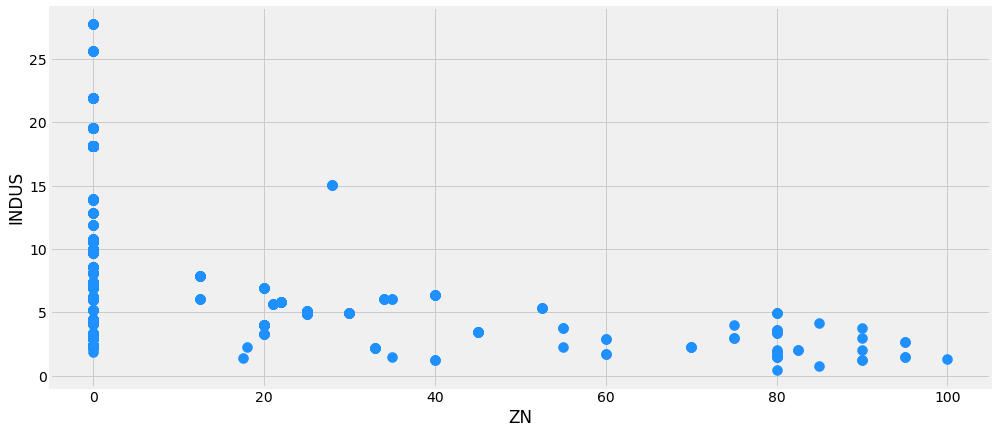

In [59]:
# More info at https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-scatter
# s refers to the marker size
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

### How to use a list comprehension to change the marker size of the scatter plot dots based on `DIS`

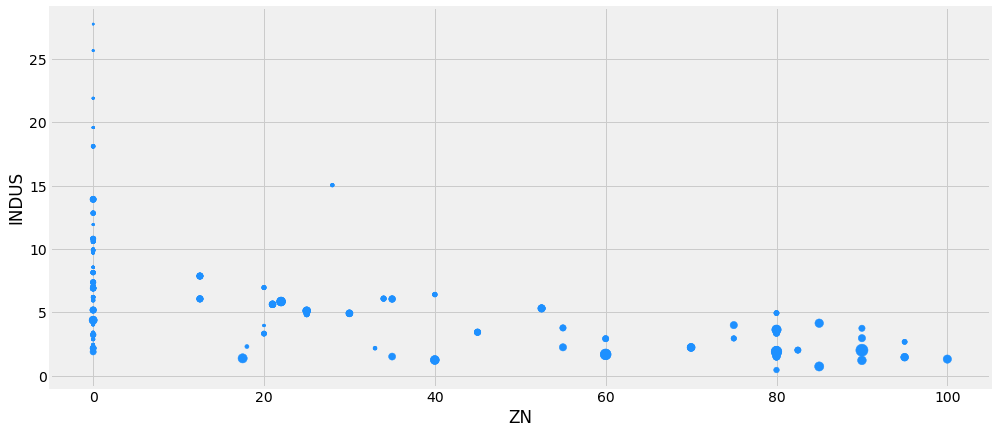

In [60]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), 
             # marker size will be the square of value in DIS column
             s=[x**2 for x in housing['DIS']]);

<a id="seaborn"></a>
## Seaborn `pairplot`

---

- With the `DataFrame` object `housing`, we will render a pairplot using the `Seaborn` library.
- Plot visualises pairwise relationships in a dataset.

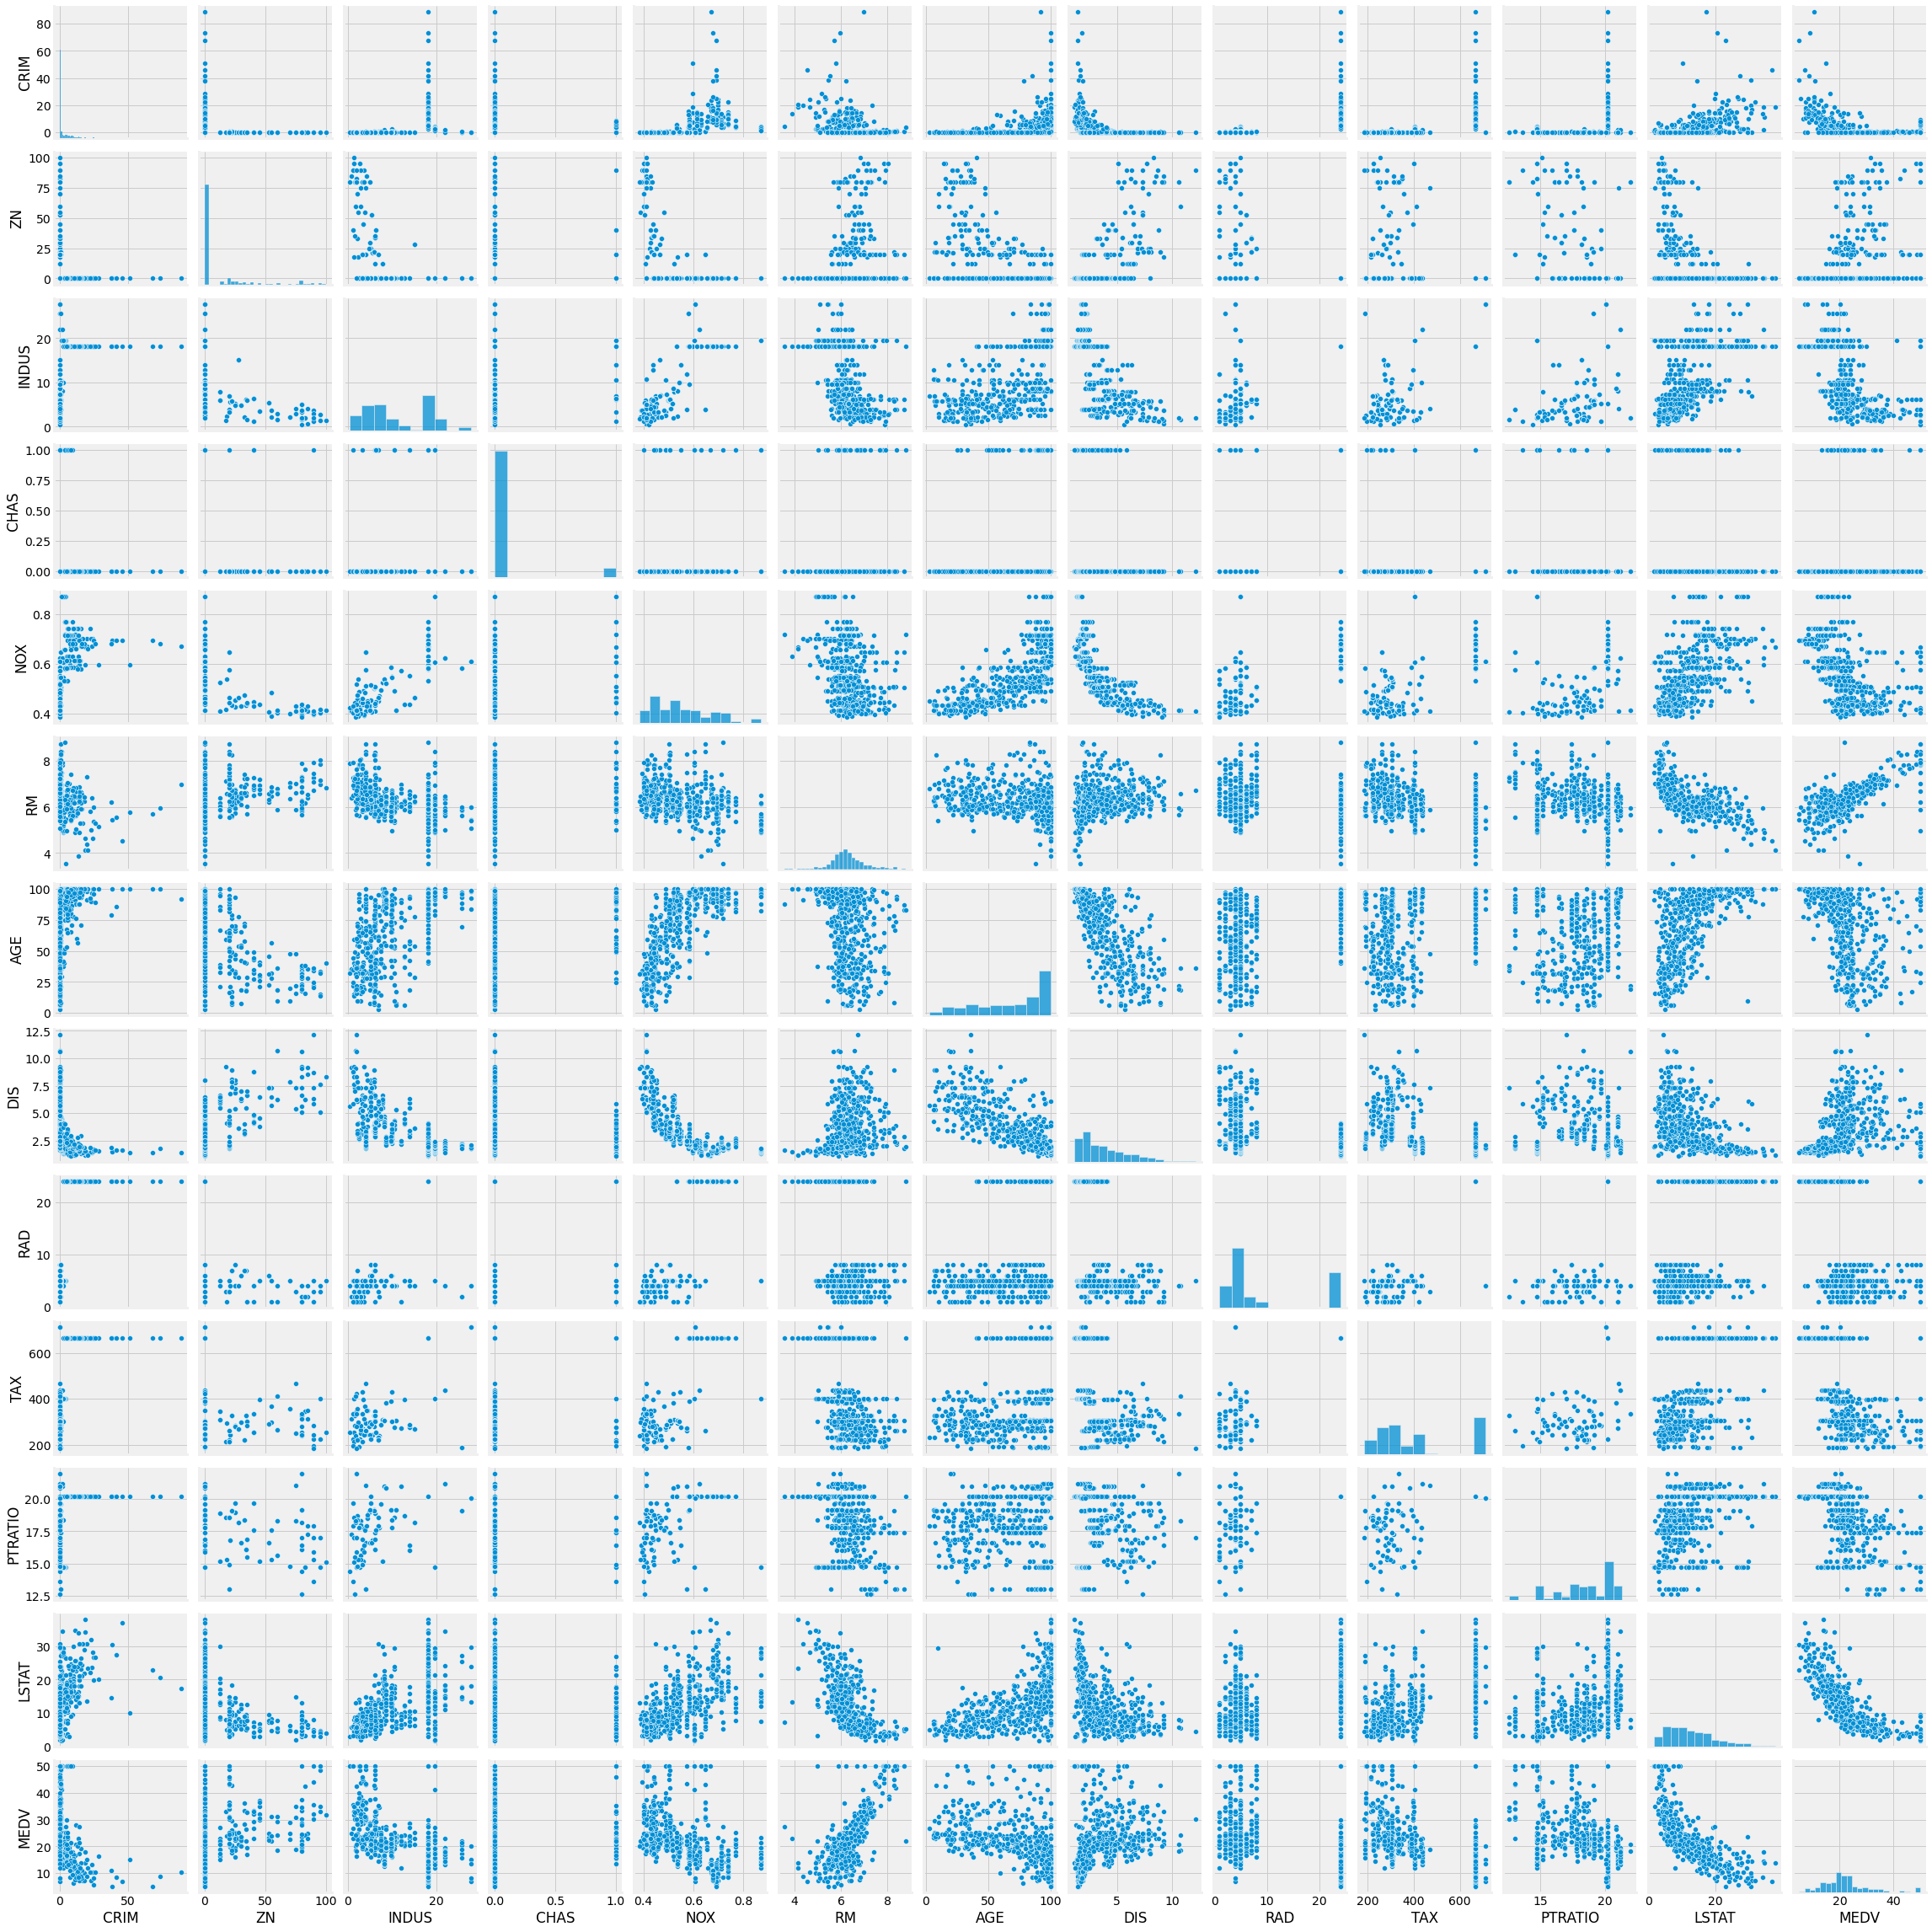

In [61]:
# More info at https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(housing);

**Summary:** _What do each of the elements represent?  Is this more or less useful than the previous plot?_
> In a pair plot we get to see every relationship between every _pair_ of variables.  We can see this is very useful for quickly discovering which variables have some kind of correlation during an exploratory data analysis.  However, when just looking at the `INDUS` feature, the pair plot is more difficult to read and interpret as opposed to the single histogram.  

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

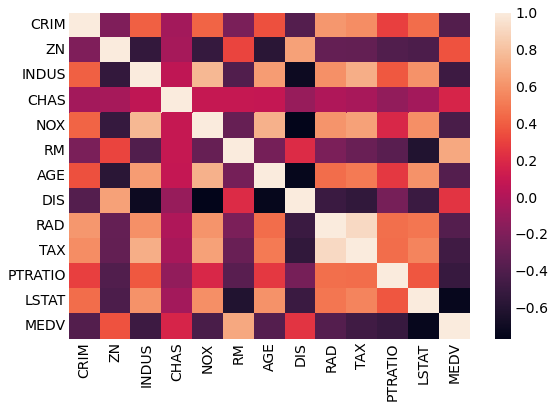

In [62]:
# Make a heatmap on the correlations between variables in the housing data
# More info at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
housing_correlations = housing.corr();
sns.heatmap(housing_correlations);

### Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

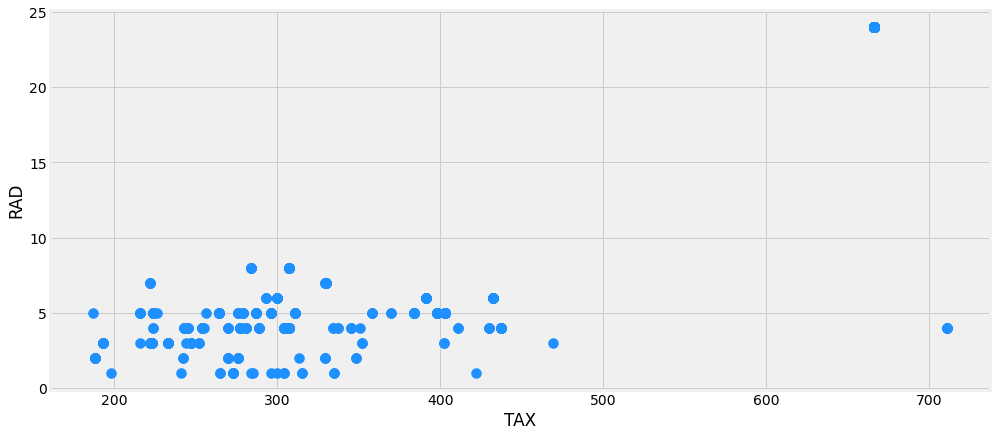

In [63]:
housing.plot(x='TAX', y='RAD', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

- Now, create a scatter plot of two heatmap entries that appear to have negative correlation.

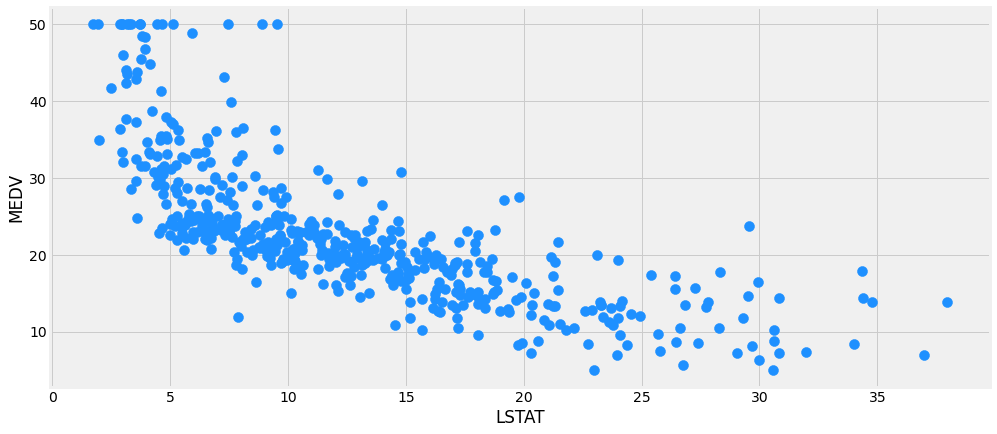

In [64]:
housing.plot(x='LSTAT', y='MEDV', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

## Let's use a bit more customization.
---

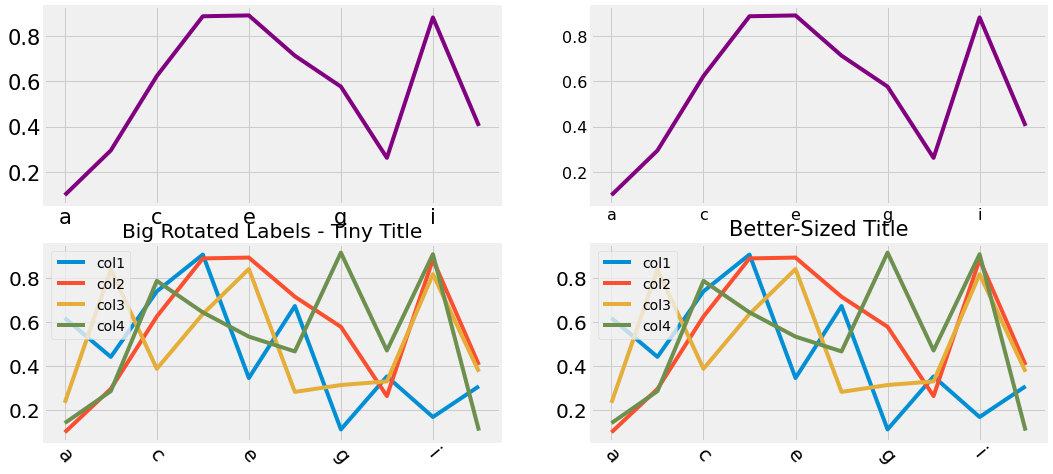

In [65]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# We can change the ticks' size.
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0])\

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(16,8), fontsize=20, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01);

## Additional Topics

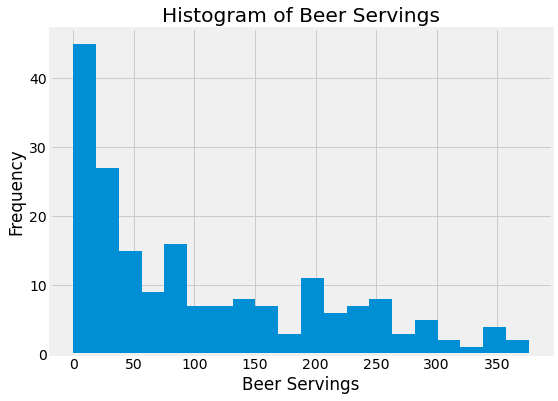

In [66]:
# Saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png');    # Save to file!

In [67]:
# List available plot styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [68]:
# Change to a different style.
plt.style.use('ggplot')

<a id="summary"></a>
### Summary

In this lesson, we looked at how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Box plots
- Special seaborn plots
- How Matplotlib works